# COVID DATAANALYSIS

In [1]:
# You may need to install wget first. 
# Do 'pip install wget' in anaconda prompt.
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
death=wget.download('https://covid.ourworldindata.org/data/ecdc/total_deaths.csv')
cases=wget.download('https://covid.ourworldindata.org/data/ecdc/total_cases.csv')

100% [..............................................................................] 39636 / 39636

In [3]:
df_deaths=pd.read_csv(death,index_col='date')
df_cases=pd.read_csv(cases,index_col='date')

In [24]:
df_deaths.tail()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe,days
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,41885,4.0,15.0,35.0,12.0,2.0,0.0,0.0,24.0,3.0,...,4079,0.0,1.0,2.0,0.0,3.0,0.0,0.0,1.0,92.0
2020-04-02,46883,4.0,15.0,58.0,14.0,2.0,0.0,0.0,31.0,3.0,...,5138,0.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,93.0
2020-04-03,51514,4.0,16.0,58.0,15.0,2.0,0.0,0.0,34.0,4.0,...,6053,0.0,4.0,2.0,0.0,3.0,0.0,1.0,1.0,94.0
2020-04-04,58141,4.0,17.0,83.0,16.0,2.0,0.0,0.0,37.0,7.0,...,7157,0.0,4.0,2.0,0.0,3.0,0.0,1.0,1.0,95.0
2020-04-05,64400,5.0,19.0,130.0,17.0,2.0,0.0,0.0,43.0,7.0,...,8501,0.0,5.0,2.0,0.0,5.0,0.0,1.0,1.0,96.0


In [5]:
df_cases.index.dtype


dtype('O')

In [6]:
df_cases.head()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [7]:
listy=df_cases.columns
matches = [x for x in listy if x=='China']
matches

['China']

In [8]:
print (df_cases.index.dtype)
#looks like index is not datetime!
df_cases.index = pd.to_datetime(df_cases.index)
df_deaths.index = pd.to_datetime(df_deaths.index)
print (df_cases.index.dtype)

object
datetime64[ns]


In [9]:
#Subtract date to find number of days
df_cases['days'] = df_cases.index - df_cases.index[0]
df_deaths['days'] = df_deaths.index - df_deaths.index[0]
#Turns out the result is still datetime. Converting it to float below:
df_cases['days']=df_cases['days']/np.timedelta64(1,'D')
df_deaths['days']=df_deaths['days']/np.timedelta64(1,'D')
df_deaths.head()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Zimbabwe,days
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0
2020-01-03,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4.0


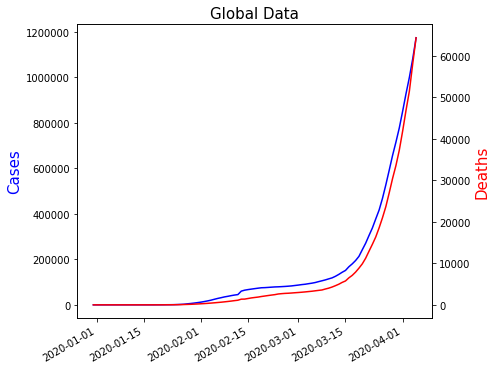

In [10]:
from matplotlib.dates import DateFormatter
fig,ax1=plt.subplots(figsize=[7,5])
ax1.plot(df_cases.index,df_cases.World,'b')
ax1.set_ylabel('Cases',color='b',fontsize=15)
ax2=ax1.twinx()
ax2.plot(df_deaths.index,df_deaths.World,'r')
ax2.set_ylabel('Deaths',color='r',fontsize=15)
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.title('Global Data',fontsize=15)
plt.show()

In [11]:
#Determine correlation coeffecient
from scipy.stats import pearsonr # used for linear variation
from scipy.stats import spearmanr # used for nonlinear looking variation
corr_p = pearsonr(np.array(df_cases.World),np.array(df_deaths.World))
corr_s= spearmanr(np.array(df_cases.World),np.array(df_deaths.World))
print('Pearsons correlation:', corr_p[0])
print('Spearmans correlation:',corr_s[0])

Pearsons correlation: 0.9958114102383886
Spearmans correlation: 0.9989108023069362


In [12]:
# Filter column when cases >0 in US
df_cases[df_cases['United States']>0]['United States']

date
2020-01-21         1
2020-01-22         1
2020-01-23         1
2020-01-24         1
2020-01-25         2
               ...  
2020-04-01    189618
2020-04-02    216721
2020-04-03    245540
2020-04-04    277965
2020-04-05    312237
Name: United States, Length: 76, dtype: int64

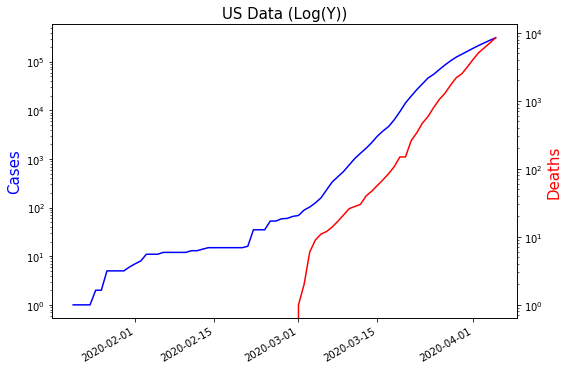

In [13]:
fig,ax1=plt.subplots(figsize=[8,5])
ax1.semilogy(df_cases[df_cases['United States']>0].index,
         df_cases[df_cases['United States']>0]['United States'],'b')
ax1.set_ylabel('Cases',color='b',fontsize=15)
ax2=ax1.twinx()
ax2.semilogy(df_deaths[df_cases['United States']>0].index,
         df_deaths[df_cases['United States']>0]['United States'],'r')
ax2.set_ylabel('Deaths',color='r',fontsize=15)
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.title('US Data (Log(Y))',fontsize=15)
plt.show()

## Fitting Chinese data 

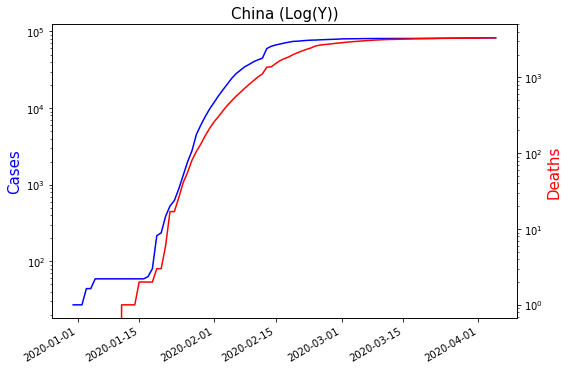

In [14]:
fig,ax1=plt.subplots(figsize=[8,5])
ax1.semilogy(df_cases[df_cases['China']>0].index,
         df_cases[df_cases['China']>0]['China'],'b')
ax1.set_ylabel('Cases',color='b',fontsize=15)
ax2=ax1.twinx()
ax2.semilogy(df_deaths[df_cases['China']>0].index,
         df_deaths[df_cases['China']>0]['China'],'r')
ax2.set_ylabel('Deaths',color='r',fontsize=15)
plt.gcf().autofmt_xdate()
fig.tight_layout()
plt.title('China (Log(Y))',fontsize=15)
plt.show()


In [15]:
from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return (y)

xdata=df_cases[df_cases['China']>0].days
ydata=df_cases[df_cases['China']>0]['China']
'''p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for the
    function can be determined using introspection, otherwise a
    ValueError is raised)'''
p0 = [max(ydata), np.median(xdata),1] 
'''popt: Optimal values for the parameters so that the sum of the squared residuals of 
f(xdata, *popt) - ydata is minimized'''
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0,method='dogbox')
print (popt)
print ('\n',pcov)

[8.13556159e+04 4.03535342e+01 2.22732812e-01]

 [[ 5.30382747e+04  8.78083031e+00 -3.37691121e-01]
 [ 8.78083031e+00  1.00240486e-02 -5.59068263e-05]
 [-3.37691121e-01 -5.59068263e-05  1.85027757e-05]]


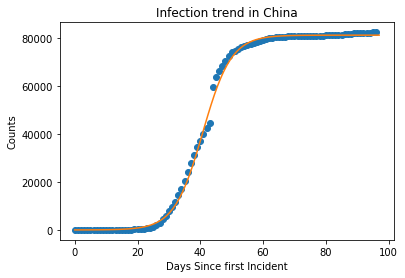

In [16]:
plt.plot(xdata,ydata,'o',label='data')
x=np.linspace(0,len(df_cases),len(df_cases))
plt.plot(x,sigmoid(xdata, *popt),label='fit')
plt.xlabel('Days Since first Incident')
plt.ylabel('Counts')
plt.title('Infection trend in China')
plt.show()

## Fitting US "Cases" data

C:\Users\plasm\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


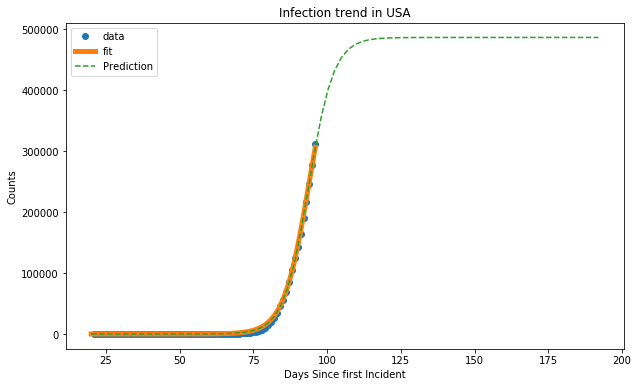

In [17]:
xdata1=df_cases[df_cases['United States']>0].days
ydata1=df_cases[df_cases['United States']>0]['United States']
p0 = [max(ydata1), np.median(xdata1)*1.2,28] 
#p0 = [1000000,90,0.2]
#p1 = [2500000,90,20]
popt, pcov = curve_fit(sigmoid, xdata1, ydata1,p0,method='dogbox')
#popt2, pcov2 = curve_fit(sigmoid, xdata1, ydata1,p1,method='dogbox')
###########
plt.figure(figsize=[10,6])
plt.plot(xdata1,ydata1,'o',label='data')
x_pred=np.linspace(20,max(df_cases.days)*2,len(df_cases[df_cases['United States']>0]['United States']))
x=np.linspace(20,max(df_cases.days),len(df_cases[df_cases['United States']>0]['United States']))
#X_new=np.linspace(20,max(df_cases.days)*2,len(df_cases[df_cases['United States']>0]['United States']))
plt.plot(x,sigmoid(xdata1, *popt),label='fit',linewidth=5)
plt.plot(x_pred,sigmoid(x_pred, *popt),label='Prediction',linestyle='dashed')
plt.xlabel('Days Since first Incident')
plt.ylabel('Counts')
plt.legend()
plt.title('Infection trend in USA')
plt.show()

In [18]:
max(ydata1), np.median(xdata1)*1.2

(312237, 70.2)

In [19]:
y=sigmoid(x_pred, *popt)


In [25]:
newj=pd.DataFrame({'x':x_pred,'y':np.round(y,0)})
newj.tail()

,x,y
71,182.826667,486362.0
72,185.120000,486362.0
73,187.413333,486362.0
74,189.706667,486362.0
75,192.000000,486362.0


In [21]:
newj.describe()

,x,y
count,76.000000,76.000000
mean,106.000000,277341.302632
std,50.644084,230054.708328
min,20.000000,0.000000
25%,63.000000,346.500000
50%,106.000000,460052.000000
75%,149.000000,486360.250000
max,192.000000,486362.000000


C:\Users\plasm\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


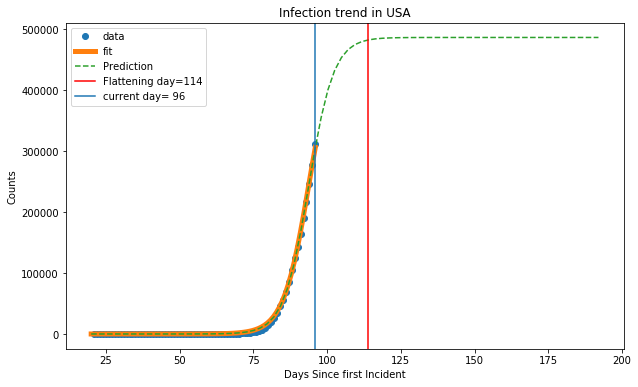

In [22]:
xdata1=df_cases[df_cases['United States']>0].days
ydata1=df_cases[df_cases['United States']>0]['United States']
p0 = [max(ydata1), np.median(xdata1)*1.2,28] 
#p0 = [1000000,90,0.2]
#p1 = [2500000,90,20]
popt, pcov = curve_fit(sigmoid, xdata1, ydata1,p0,method='dogbox')
#popt2, pcov2 = curve_fit(sigmoid, xdata1, ydata1,p1,method='dogbox')
###########
plt.figure(figsize=[10,6])
plt.plot(xdata1,ydata1,'o',label='data')
x_pred=np.linspace(20,max(df_cases.days)*2,len(df_cases[df_cases['United States']>0]['United States']))
x=np.linspace(20,max(df_cases.days),len(df_cases[df_cases['United States']>0]['United States']))
#X_new=np.linspace(20,max(df_cases.days)*2,len(df_cases[df_cases['United States']>0]['United States']))
plt.plot(x,sigmoid(xdata1, *popt),label='fit',linewidth=5)
plt.plot(x_pred,sigmoid(x_pred, *popt),label='Prediction',linestyle='dashed')
plt.axvline(114,ymin=0,ymax=1,label='Flattening day=114',color='red')
plt.axvline(xdata[-1],ymin=0,ymax=1,label='current day= %g' %(xdata[-1]))
plt.xlabel('Days Since first Incident')
plt.ylabel('Counts')
plt.legend()
plt.title('Infection trend in USA')
plt.show()

## Fitting US 'Deaths' data: 

In [33]:
xdata1=df_deaths[df_deaths['United States']>0].days
ydata1=df_deaths[df_deaths['United States']>0]['United States']
p0 = [max(ydata1), np.median(xdata1),1] 
#p0 = [1000000,90,0.2]
#p1 = [2500000,90,20]
popt, pcov = curve_fit(sigmoid, xdata1, ydata1,p0,method='dogbox')

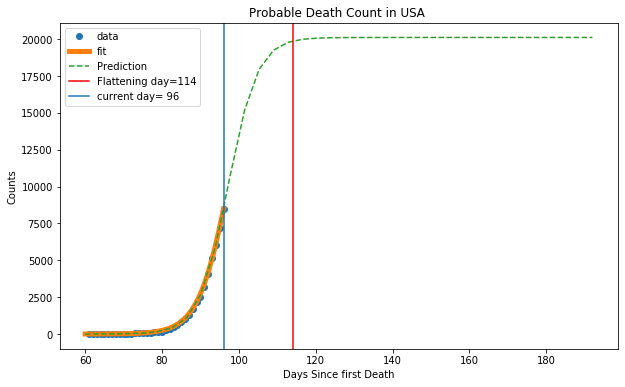

In [55]:
plt.figure(figsize=[10,6])
plt.plot(xdata1,ydata1,'o',label='data')
x_pred=np.linspace(60,max(df_deaths.days)*2,len(df_deaths[df_deaths['United States']>0]['United States']))
x=np.linspace(60,max(df_deaths.days),len(df_deaths[df_deaths['United States']>0]['United States']))
X_new=np.linspace(20,max(df_cases.days)*2,len(df_cases[df_cases['United States']>0]['United States']))
plt.plot(x,sigmoid(xdata1, *popt),label='fit',linewidth=5)
plt.plot(x_pred,sigmoid(x_pred, *popt),label='Prediction',linestyle='dashed')
plt.axvline(114,ymin=0,ymax=1,label='Flattening day=114',color='red')
plt.axvline(xdata[-1],ymin=0,ymax=1,label='current day= %g' %(xdata[-1]))
plt.xlabel('Days Since first Death')
plt.ylabel('Counts')
plt.legend()
plt.title('Probable Death Count in USA ')
plt.show()